In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm

In [2]:
data = pd.read_csv('Invistico_Airline.csv')

In [3]:
data.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [4]:
data

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3                 3                1            2   
129877                 3                 4                2            3   
129878                 2                 3                2            1   
129879                 5                 5                3            3

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [6]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

Categorical Columns

In [8]:
cat_columns = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel',
       'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

Numerical Columns

In [9]:
num_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [10]:
data[num_columns].describe()

Age  Flight Distance  Departure Delay in Minutes  \
count  129880.000000    129880.000000               129880.000000   
mean       39.427957      1981.409055                   14.713713   
std        15.119360      1027.115606                   38.071126   
min         7.000000        50.000000                    0.000000   
25%        27.000000      1359.000000                    0.000000   
50%        40.000000      1925.000000                    0.000000   
75%        51.000000      2544.000000                   12.000000   
max        85.000000      6951.000000                 1592.000000   

       Arrival Delay in Minutes  
count             129487.000000  
mean                  15.091129  
std                   38.465650  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                 1584.000000

In [11]:
#Descriptive Statistics on Categorical Columns
data[cat_columns].astype('object').describe()

satisfaction  Gender   Customer Type   Type of Travel     Class  \
count        129880  129880          129880           129880    129880   
unique            2       2               2                2         3   
top       satisfied  Female  Loyal Customer  Business travel  Business   
freq          71087   65899          106100            89693     62160   

        Seat comfort  Departure/Arrival time convenient  Food and drink  \
count         129880                             129880          129880   
unique             6                                  6               6   
top                3                                  4               3   
freq           29183                              29593           28150   

        Gate location  Inflight wifi service  Inflight entertainment  \
count          129880                 129880                  129880   
unique              6                      6                       6   
top                 3                      4                       4   
freq            33546                  31560                   41879   

        Online support  Ease of Online booking  On-board service  \
count           129880                  129880            129880   
unique               6                       6                 6   
top                  4                       4                 4   
freq             41510                   39920             40675   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
count             129880            129880           129880       129880   
unique                 6                 5                6            6   
top                    4                 4                4            4   
freq               39698             48240            36481        48795   

        Online boarding  
count            129880  
unique                6  
top                   4  
freq              35181

Visualizing the Data

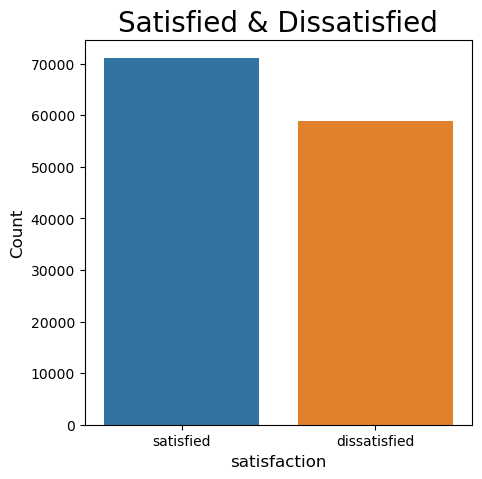

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='satisfaction', data=data, order = data['satisfaction'].value_counts().index)
plt.xticks(rotation='horizontal')
plt.title('Satisfied & Dissatisfied', fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('satisfaction', fontsize=12)
plt.show()

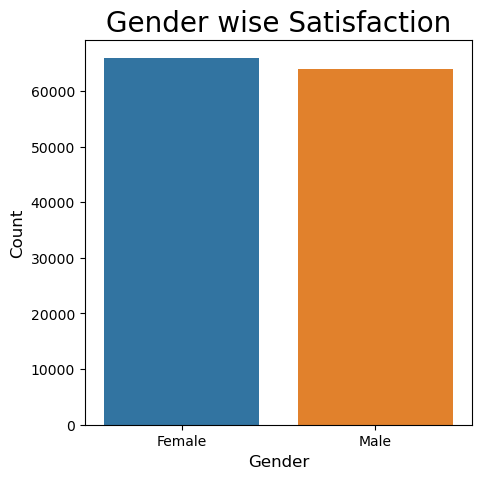

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=data, order = data['Gender'].value_counts().index)
plt.xticks(rotation='horizontal')
plt.title('Gender wise Satisfaction', fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

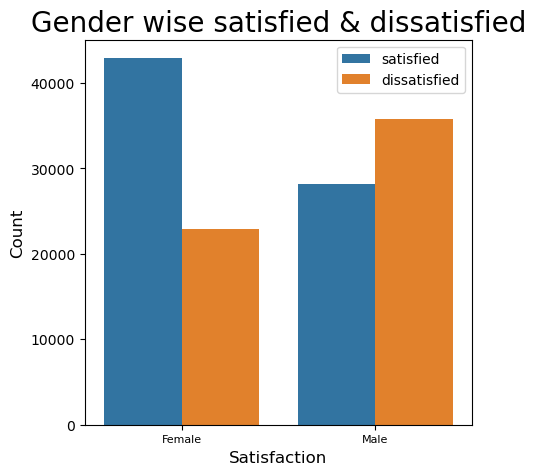

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=data, hue='satisfaction', order=data['Gender'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Gender wise satisfied & dissatisfied', fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Satisfaction', fontsize=12)
plt.legend()
plt.show()

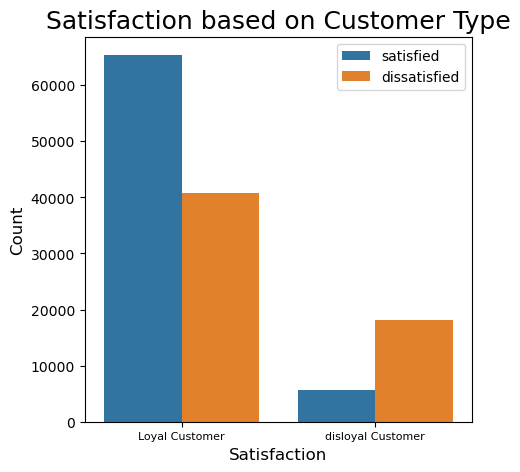

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='Customer Type', data=data, hue='satisfaction', order=data['Customer Type'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Customer Type', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Satisfaction', fontsize=12)
plt.legend()
plt.show()

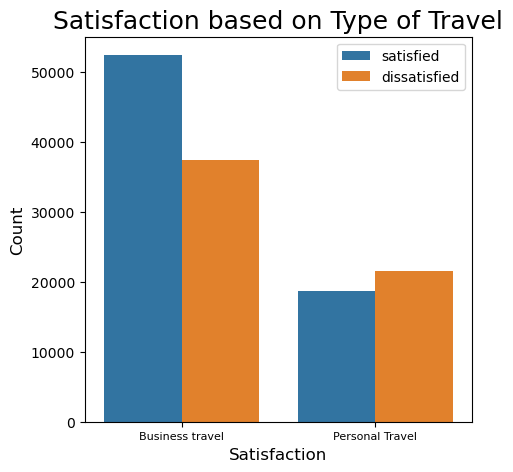

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x='Type of Travel', data=data, hue='satisfaction', order=data['Type of Travel'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Type of Travel', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Satisfaction', fontsize=12)
plt.legend()
plt.show()

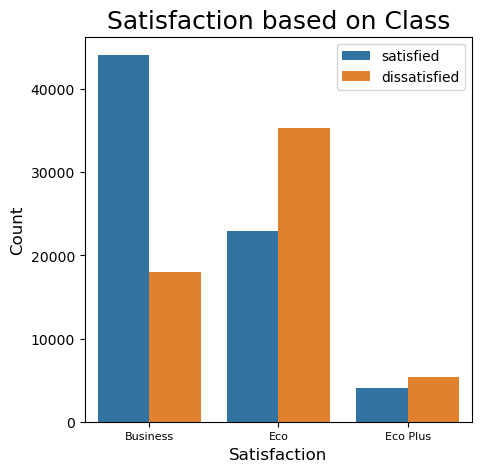

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class', data=data, hue='satisfaction', order=data['Class'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Class', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Satisfaction', fontsize=12)
plt.legend()
plt.show()

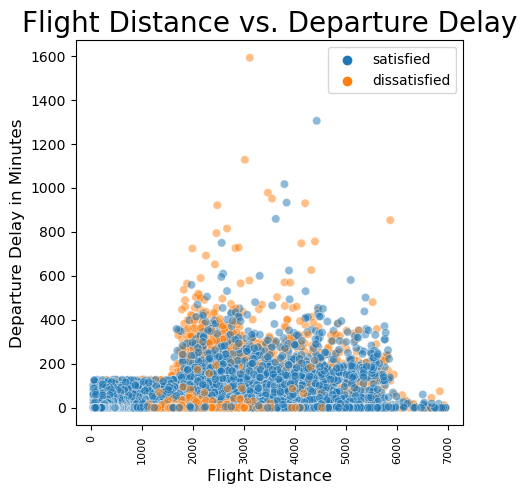

In [18]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction', alpha=0.5)
plt.xticks(size=8, rotation='vertical')
plt.ylabel('Departure Delay in Minutes', fontsize=12)
plt.xlabel('Flight Distance', fontsize=12)
plt.title('Flight Distance vs. Departure Delay', fontsize=20)
plt.legend()
plt.show()

In [19]:
import plotly.express as px
fig_p = px.sunburst(data, path=['Customer Type', 'satisfaction'], template='plotly', title='Satisfaction according to Customer Type')
fig_p.update_traces(textinfo='label+percent parent')
fig_p.show()

In [20]:
fig_1 = px.sunburst(data, path=['Gender', 'satisfaction'], template='plotly', title='Gender wise Satisfaction')
fig_1.update_traces(textinfo='label+percent parent')
fig_1.show()

In [21]:
fig_2 = px.sunburst(data, path=['Type of Travel', 'satisfaction'], template='plotly', title='Satisfaction according to Type of Travel')
fig_2.update_traces(textinfo='label+percent parent')
fig_2.show()

In [22]:
fig_3 = px.sunburst(data, path=['Class', 'satisfaction'], template='plotly', title='Satisfaction according to Class')
fig_3.update_traces(textinfo='label+percent parent')
fig_3.show()

Visualizing Columns with Rating Variable

In [23]:
rating_col = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

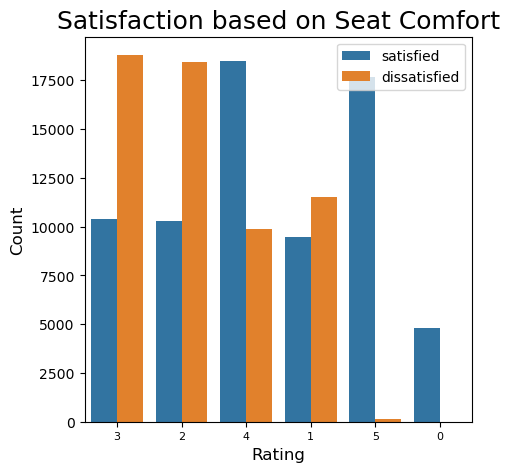

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='Seat comfort', data=data, hue='satisfaction', order=data['Seat comfort'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Seat Comfort', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

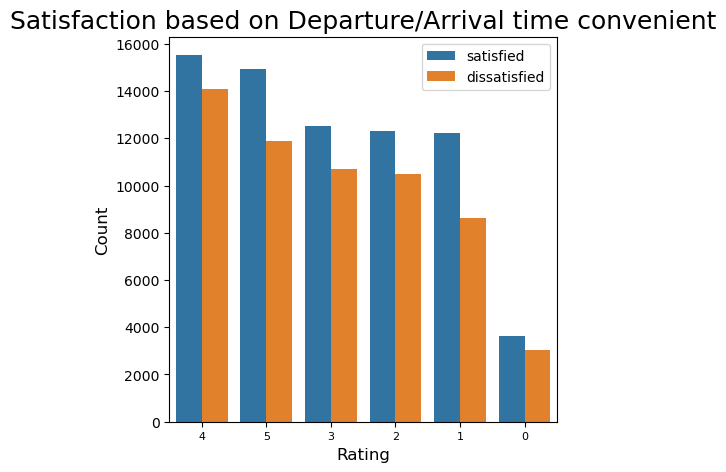

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x='Departure/Arrival time convenient', data=data, hue='satisfaction', order=data['Departure/Arrival time convenient'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Departure/Arrival time convenient', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

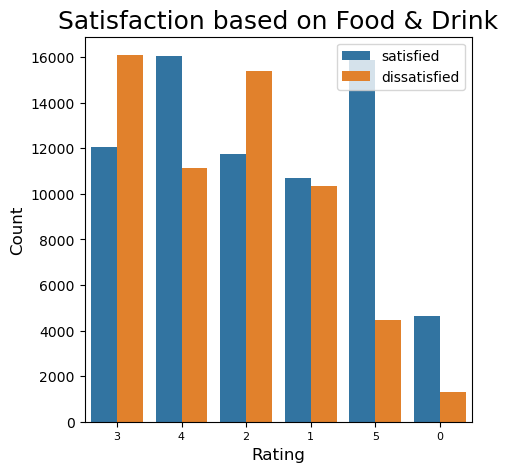

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x='Food and drink', data=data, hue='satisfaction', order=data['Food and drink'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Food & Drink', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

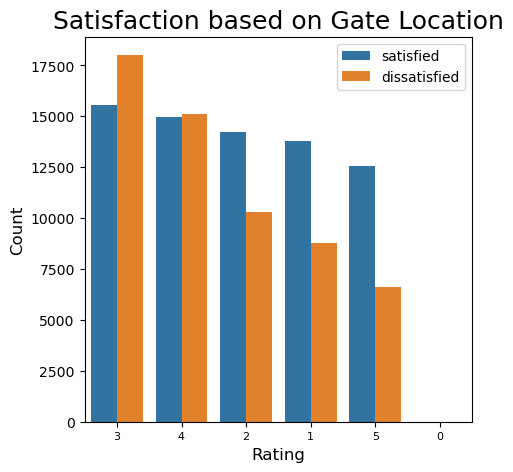

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gate location', data=data, hue='satisfaction', order=data['Gate location'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Gate Location', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

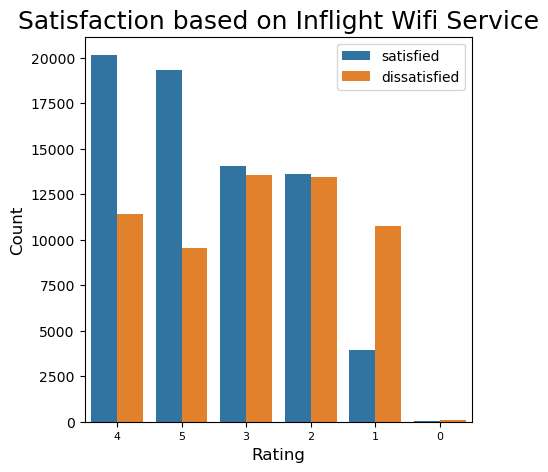

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x='Inflight wifi service', data=data, hue='satisfaction', order=data['Inflight wifi service'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Inflight Wifi Service', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

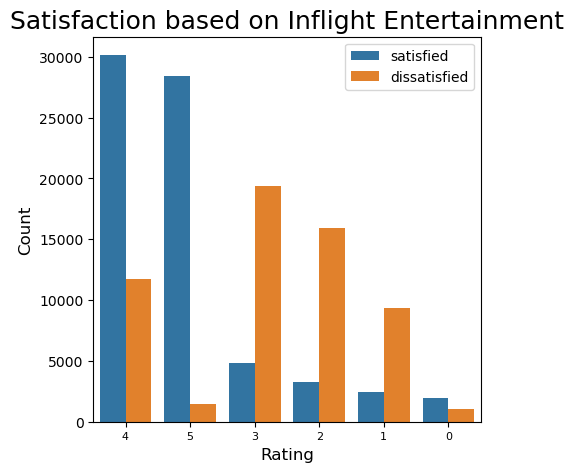

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x='Inflight entertainment', data=data, hue='satisfaction', order=data['Inflight entertainment'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Inflight Entertainment', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

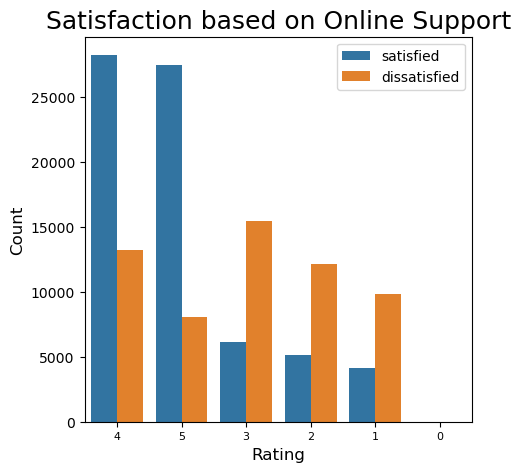

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(x='Online support', data=data, hue='satisfaction', order=data['Online support'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Online Support', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

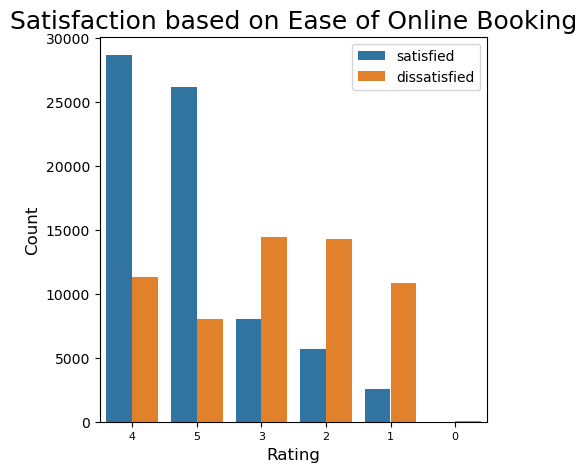

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(x='Ease of Online booking', data=data, hue='satisfaction', order=data['Ease of Online booking'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Ease of Online Booking', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

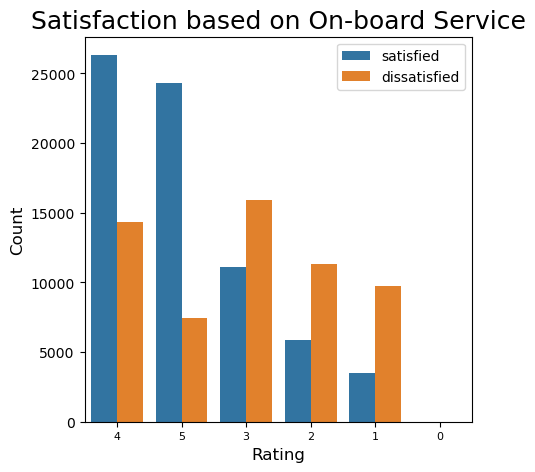

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(x='On-board service', data=data, hue='satisfaction', order=data['On-board service'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on On-board Service', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

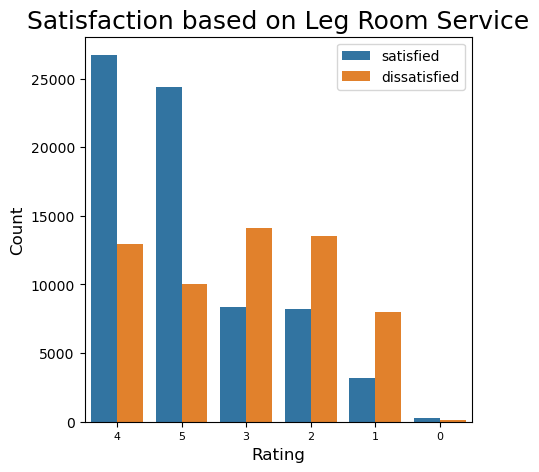

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='Leg room service', data=data, hue='satisfaction', order=data['Leg room service'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Leg Room Service', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

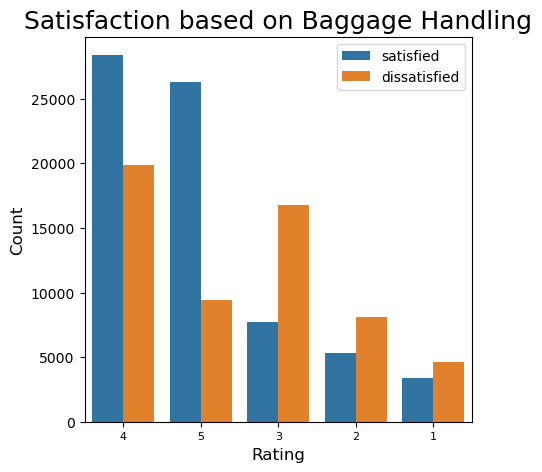

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x='Baggage handling', data=data, hue='satisfaction', order=data['Baggage handling'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Baggage Handling', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

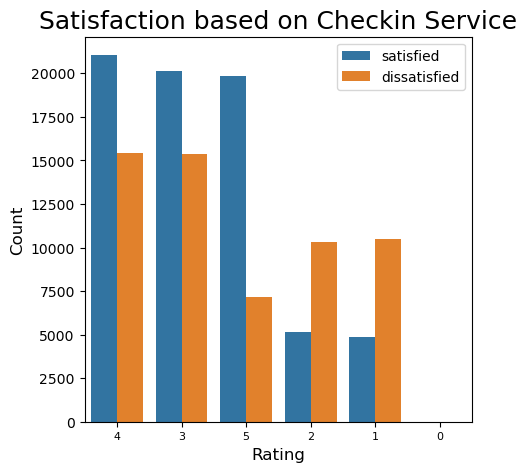

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x='Checkin service', data=data, hue='satisfaction', order=data['Checkin service'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Checkin Service', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

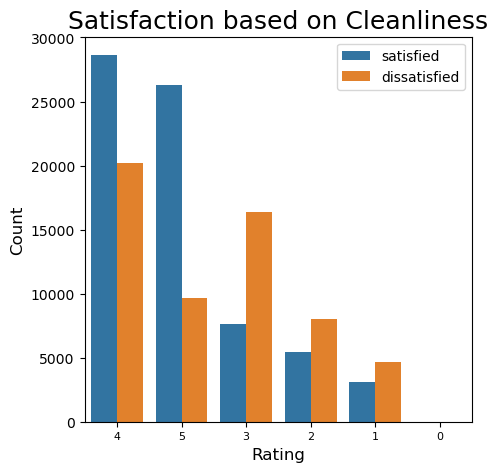

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x='Cleanliness', data=data, hue='satisfaction', order=data['Cleanliness'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Cleanliness', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

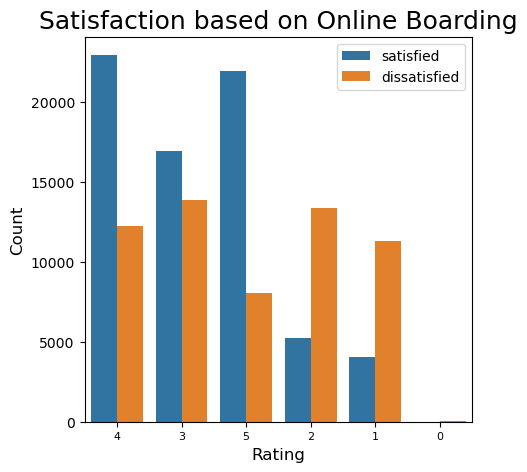

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x='Online boarding', data=data, hue='satisfaction', order=data['Online boarding'].value_counts().index)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Online Boarding', fontsize=18)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.legend()
plt.show()

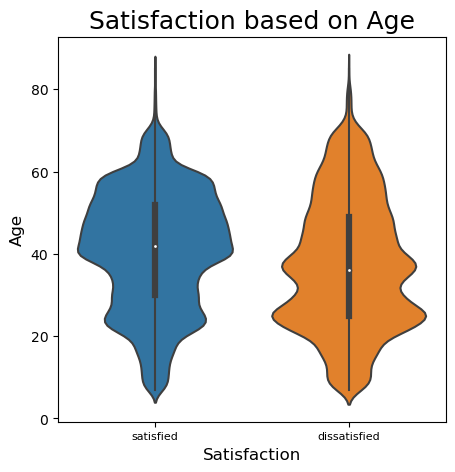

In [38]:
plt.figure(figsize=(5,5))
sns.violinplot(x='satisfaction', y = 'Age', data=data)
plt.xticks(size=8, rotation='horizontal')
plt.title('Satisfaction based on Age', fontsize=18)
plt.ylabel('Age', fontsize=12)
plt.xlabel('Satisfaction', fontsize=12)
plt.show()

Preprocessing

In [39]:
data.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [40]:
data

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Inflight entertainment  Online support  Ease of Online booking  \
0                            4               2                       3   
1                            2               2                       3   
2                            0               2                       2   
3                            4               3                       1   
4                            3               4                       2   
...                        ...             ...                     ...   
129875                       5               2                       2   
129876                       1               1                       3   
129877                       2               2                       4   
129878                       2               2                       3   
129879                       3               3                       4   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      3                 0                 3                5   
1                      4                 4                 4                2   
2                      3                 3                 4                4   
3                      1                 0                 1                4   
4                      2                 0                 2                4   
...                  ...               ...               ...              ...   
129875                 3                 3                 4                4   
129876                 2                 3                 3                1   
129877                 4                 3                 4                2   
129878                 3  

Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [42]:
#Splitting the data
X = data.drop('satisfaction', axis=1)
y= data.satisfaction

In [43]:
Label_Encode = LabelEncoder()
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
num_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

for col in cat_columns:
    X[col] = Label_Encode.fit_transform(X[col])
    
scaling = MinMaxScaler()

X[num_columns] = scaling.fit_transform(X[num_columns])

X

Gender  Customer Type       Age  Type of Travel  Class  \
0            0              0  0.743590               1      1   
1            1              0  0.512821               1      0   
2            0              0  0.102564               1      1   
3            0              0  0.679487               1      1   
4            0              0  0.807692               1      1   
...        ...            ...       ...             ...    ...   
129875       0              1  0.282051               1      1   
129876       1              1  0.717949               1      0   
129877       1              1  0.794872               1      1   
129878       1              1  0.756410               1      1   
129879       0              1  0.397436               1      1   

        Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              0.031155             0                                  0   
1              0.349804             0                                  0   
2              0.302565             0                                  0   
3              0.083031             0                                  0   
4              0.044052             0                                  0   
...                 ...           ...                                ...   
129875         0.243588             5                                  5   
129876         0.295175             2                                  3   
129877         0.328938             3                                  0   
129878         0.347776             3                                  2   
129879         0.616867             3                                  4   

        Food and drink  Gate location  ...  Inflight entertainment  \
0                    0              2  ...                       4   
1                    0              3  ...                       2   
2                    0              3  ...                       0   
3                    0              3  ...                       4   
4                    0              3  ...                       3   
...                ...            ...  ...                     ...   
129875               5              3  ...                       5   
129876               2              4  ...                       1   
129877               3              3  ...                       2   
129878               3              2  ...                       2   
129879               3              3  ...                       3   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3            

Train & Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("Train data - X shape:", X_train.shape)
print("Test data- X shape:", X_test.shape)
print("Train data - y shape:", y_train.shape)
print("Test data - y shape:", y_test.shape)

Train data - X shape: (103904, 21)
Test data- X shape: (25976, 21)
Train data - y shape: (103904,)
Test data - y shape: (25976,)


## Model Training

### Using Decision Tree Classifier

In [45]:
dec_tree = DecisionTreeClassifier(random_state=0, max_depth=15, min_samples_split=9, min_samples_leaf=9)
dec_tree.fit(X_train, y_train)
y_pred1 = dec_tree.predict(X_test)
y_pred2 = dec_tree.predict(X_train)
acc_score1 = accuracy_score(y_test, y_pred1)
print('Test Accuracy:', acc_score1)

Test Accuracy: 0.9429858330766862


In [46]:
acc_score2 = accuracy_score(y_train, y_pred2)
print('Train Accuracy:', acc_score2)

Train Accuracy: 0.9569313982137357


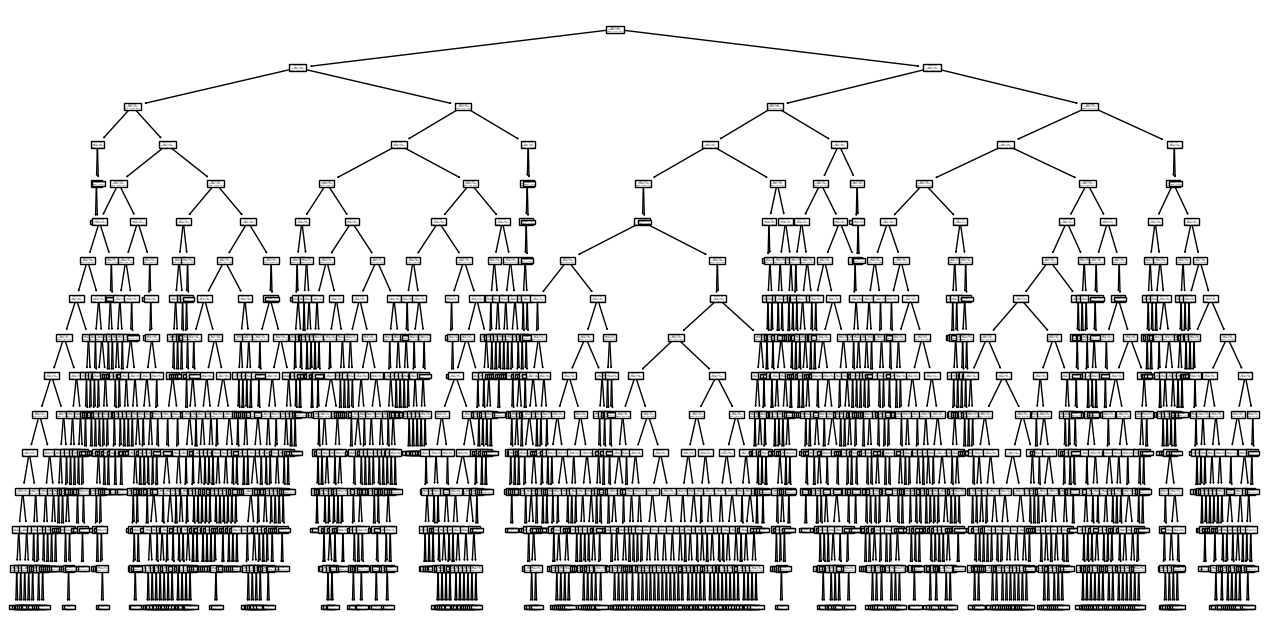

In [47]:
plt.figure(figsize=(16,8))
tree.plot_tree(dec_tree)
plt.show()

### Using Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
ran_f = RandomForestClassifier(max_depth=15, min_samples_split=10, min_samples_leaf=10)
ran_f.fit(X_train, y_train)
y_pred3 = ran_f.predict(X_test)
y_pred4 = ran_f.predict(X_train)
acc_score3 = accuracy_score(y_test, y_pred3)
acc_score4 = accuracy_score(y_train, y_pred4)
print('Test Accuracy:', acc_score3)
print('Train Accuracy:', acc_score4)

Test Accuracy: 0.9460271019402525
Train Accuracy: 0.9560170927009547


### Using Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [50]:
nb_train = GaussianNB()
nb_train.fit(X_train, y_train)

y_pred5 = nb_train.predict(X_test)
y_pred6 = nb_train.predict(X_train)

acc_score5 = accuracy_score(y_test, y_pred5)
acc_score6 = accuracy_score(y_train, y_pred6)


print('Test Accuracy:', acc_score5)

print('Train Accuracy:', acc_score6)
precision = metrics.precision_score(y_test, y_pred5, average='weighted')
print('Precision:', precision)


Test Accuracy: 0.8159839852171235
Train Accuracy: 0.821460194025254
Precision: 0.8161353549237833


### Using KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
data.dropna(inplace=True)
data['satisfaction'] = data['satisfaction'].replace({'satisfied': 0, 'dissatisfied': 1})
cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(data, columns=cols)

In [53]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_train_pred = knn.predict(X_train)
print("Training Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

Training Results:
Confusion Matrix:
[[53276  3521]
 [ 1867 45240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     56797
           1       0.93      0.96      0.94     47107

    accuracy                           0.95    103904
   macro avg       0.95      0.95      0.95    103904
weighted avg       0.95      0.95      0.95    103904



In [57]:
y_test_pred = knn.predict(X_test)
print("Test Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Results:
Confusion Matrix:
[[12990  1300]
 [  706 10980]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     14290
           1       0.89      0.94      0.92     11686

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [58]:
y_train_prob = knn.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

In [59]:
y_test_prob = knn.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

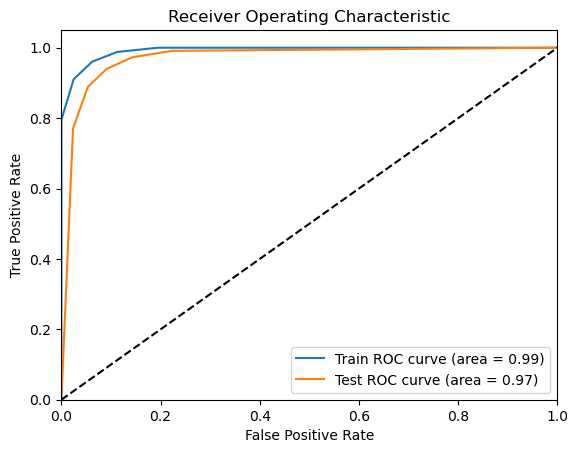

In [60]:
plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [62]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [65]:
y_pred7 = svm_clf.predict(X_test)
y_pred8 = svm_clf.predict(X_train)
acc_score7 = accuracy_score(y_test, y_pred7)
acc_score8 = accuracy_score(y_train, y_pred8)
print('Test Accuracy:', acc_score7)
print('Train Accuracy:', acc_score8)

Test Accuracy: 0.938789651986449
Train Accuracy: 0.9399253156760087
